In [2]:
!pip install numpy
!pip install opencv-contrib-python
!pip install tensorflow
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/fd/c1/45d9db130d0095db7ea82513246064bb7194c9977670a312c493a2d7bfdc/opencv_contrib_python-4.1.0.25-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f4/28/96efba1a516cdacc2e2d6d081f699c001d414cc8ca3250e6d59ae657eb2b/tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ce/86/9f6123c4c6f481862f286dbe13aa2e97bdedd7662f5fc3033c1a41f32f88/protobuf-3.8.0-cp37-cp37m-manylinux1_x86_6

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(422, 380)


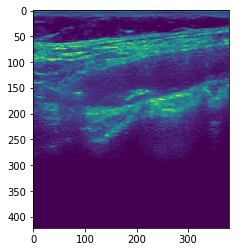

(422, 380)


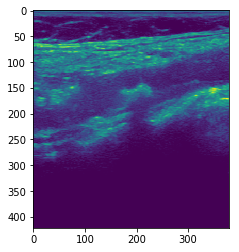

(422, 380)


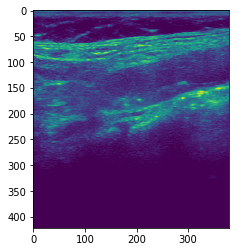

(422, 380)


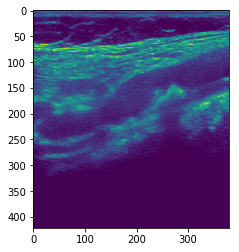

(422, 380)


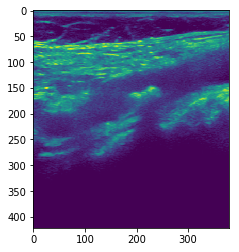

(422, 380)


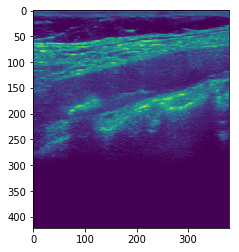

(422, 380)


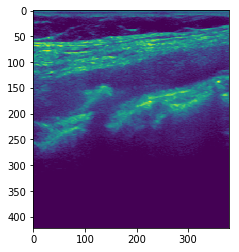

(422, 265)


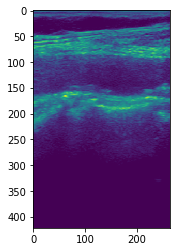

(422, 380)


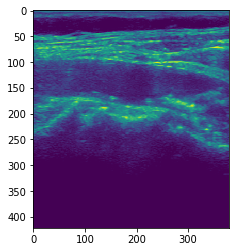

(422, 380)


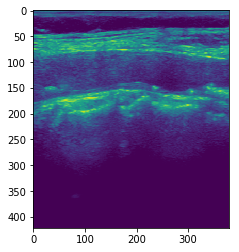

(422, 380)


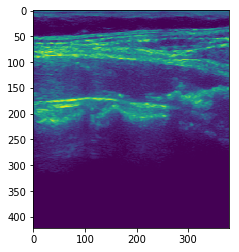

(422, 380)


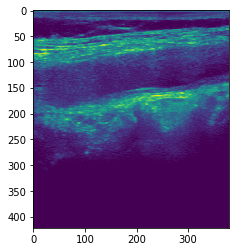

(422, 380)


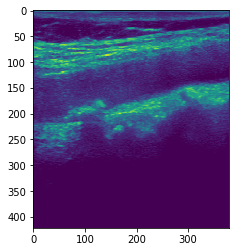

(422, 380)


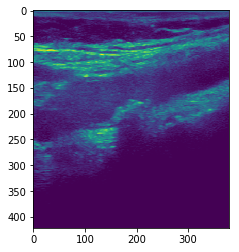

(422, 380)


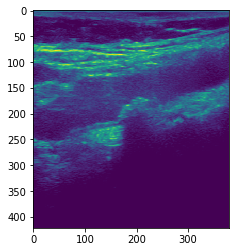

(422, 380)


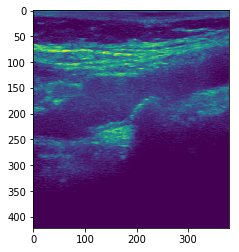

(422, 380)


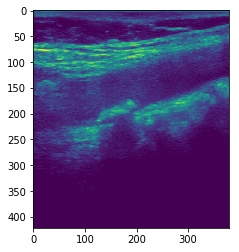

(422, 380)


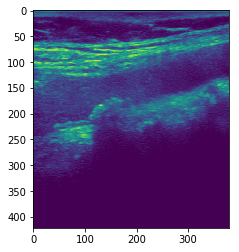

(422, 380)


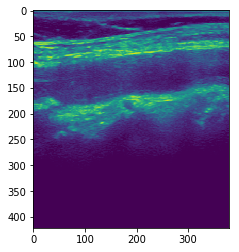

(422, 380)


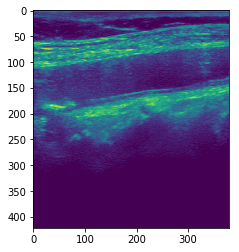

(422, 380)


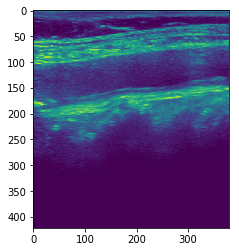

(422, 380)


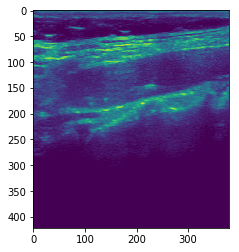

(422, 380)


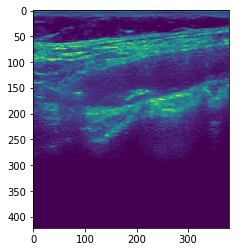

(422, 380)


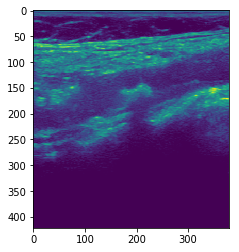

(422, 380)


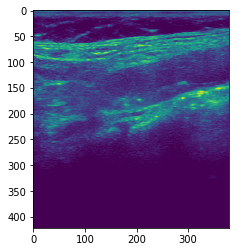

(422, 380)


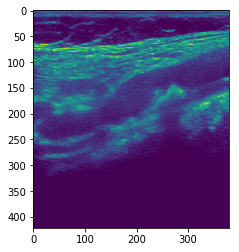

(422, 380)


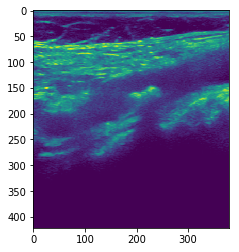

(422, 380)


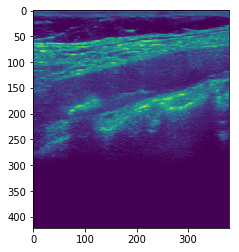

(422, 380)


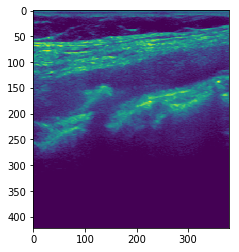

(422, 380)


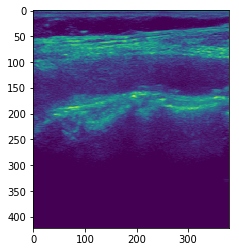

(422, 380)


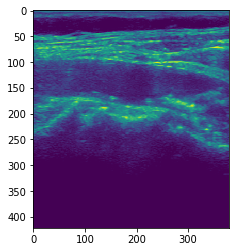

(422, 380)


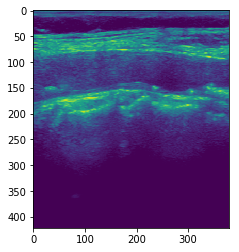

(422, 380)


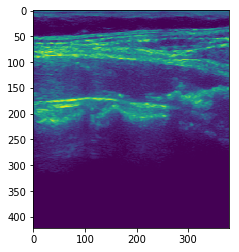

(422, 380)


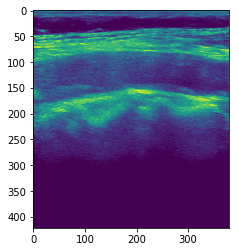

(422, 380)


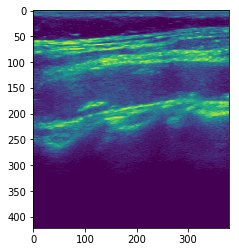

(422, 380)


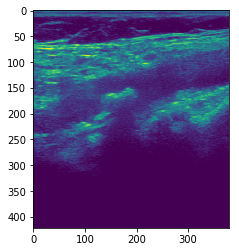

(422, 380)


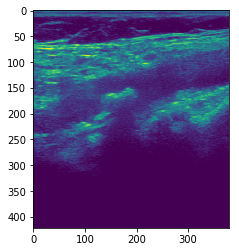

(422, 380)


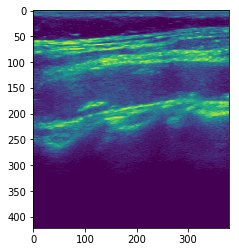

(422, 380)


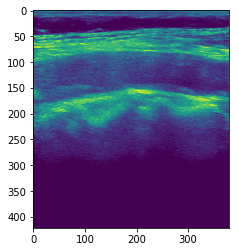

(422, 380)


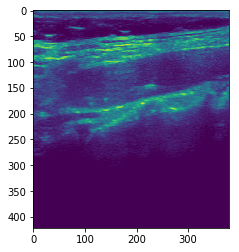

(422, 380)


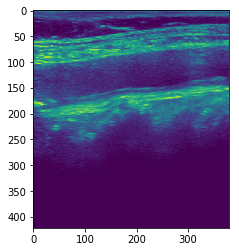

(422, 380)


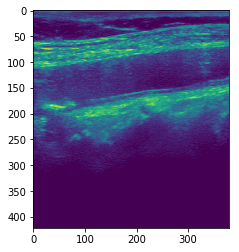

(422, 380)


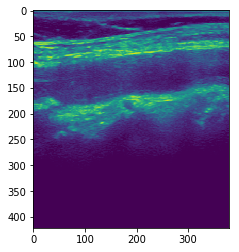

(422, 380)


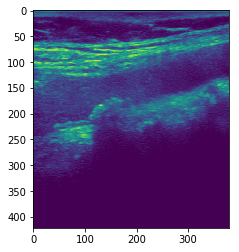

(422, 276)


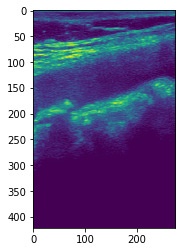

(422, 380)


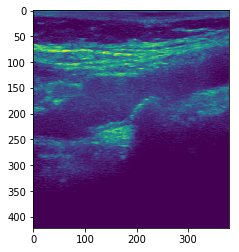

(422, 380)


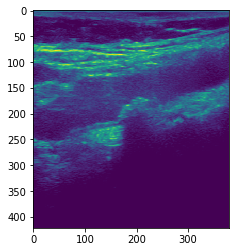

(422, 380)


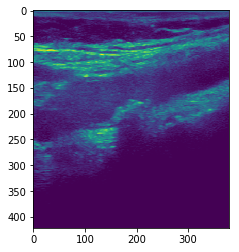

(422, 380)


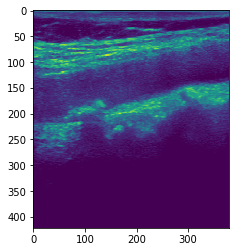

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

w = 64
h = 64

for i in range(1,50):
    img = cv2.imread("Data/Raw/sagittal%d.png" % i)
    img =(img[:,120:500])
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print (gray_img.shape)
    plt.imshow(gray_img)
    plt.show()
    n = 0
    for y in range(0, 380 - h, h):
        for x in range(0, 380 - w, w):
            temp_img = gray_img[y:y+h, x:x+w]
            file_location_image = 'Data/Patches/Saggital%d_Slice%d.png' % (n,i)
            cv2.imwrite(file_location_image, temp_img)
            n += 1
 

In [24]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd

w = 64
h = 64

for fn in os.listdir('Data/Raw'):
    print(fn)
    name = fn.replace('.png','')
    img = cv2.imread(f'Data/Raw/{fn}')
    if img is not None:
        df = pd.read_csv(f'CSVs/{name}.csv')
        
        img_w, img_h, _ = img.shape
        bb = []
        for index, row in df.iterrows():
            if row['name'] != 'Total carotid':
                
                ymin = int(row['ymin'])
                ymax = int(row['ymax'])
                xmin = int(row['xmin'])
                xmax = int(row['xmax'])
                bb.append((xmin, ymin, xmax, ymax))

        n = 0
        for y in range(0, img_h - h, h):
            for x in range(0, img_w - w, w):
                inside = False
                for box in bb:
                    if ((x >= box[0] and x <= box[2]) or (x+w >= box[0] and x+w <= box[2])) and ((y >= box[1] and y <= box[3]) or (y+h >= box[1] and y+h <= box[3])):
                        inside = True
                        break
                if inside:
                    continue
                temp_img = img[y:y+h, x:x+w]

                file_location_image = f'Data/Patches/NoPlaque/sagittal_{name}_noplaque_{n}.png'
                cv2.imwrite(file_location_image, temp_img)
                #plt.imshow(temp_img)
                #plt.show()
                #print(temp_img.shape)
                n += 1
        print(n)
    

conv_D5N9EAL0.png
36
conv_D5A9HUE0.png
12
conv_D5OABR80.png
36
conv_D4C9DNGS.png
30
conv_D5V8TBO4.png
36
conv_D5OBBTC6.png
32
conv_DA38FJB6.png
30
conv_D4C9SCTS.png
36
conv_D4J9EROC.png
30
conv_D5N8Q7PG.png
32
conv_DB8AMRCQ.png
30
conv_D5V8C1IG.png
32
conv_D6E89RQC.png
36
conv_DAH8QR46.png
32
conv_D52A8EBM.png
30
conv_D6E9AN5U.png
36
conv_D4B94T5E.png
30
conv_D4C8M3PO.png
30
conv_D5A9HUP2.png
28
conv_D6E9AMTC.png
30
conv_D5U8D1I2.png
36
conv_D5G7SQ06.png
36
conv_D4B7OEOA.png
32
conv_E438PQJO.png
32
conv_D5NA7P2M.png
32
conv_D9JAMNBO.png
30
conv_D6683S0K.png
36
conv_D5H9G9H2.png
36
conv_D4B9FRB2.png
32
conv_D5G9CI16.png
36
conv_D538Q62A.png
36
conv_D5NBMNL4.png
27
conv_E43AD808.png
28
conv_D5A9I09S.png
30
conv_D599EJHI.png
36
conv_D5G8KBD0.png
32
conv_D4J9NHQ0.png
32
conv_DB8ARN98.png
36
conv_D4J92C40.png
30
conv_D5A8R1H8.png
36
conv_D5NAB3CO.png
32
conv_DB8A0DJ0.png
34
conv_D758Q4G8.png
32
conv_D9D8CS8M.png
27
conv_D7C8G3LK.png
36
conv_D4B9FRJE.png
36
conv_D527PAG8.png
30
conv_D4B81KQM

32
conv_D4B9FRAQ.png
36
conv_D5O8M4TK.png
36
conv_D52DFHO0.png
32
conv_D5G99K04.png
36
conv_D5A9HU80.png
36
conv_D5A96J3S.png
36
conv_D66AHQRC.png
32
conv_D669MCQO.png
30
conv_D4J9NHHI.png
30
conv_D5A9P1B8.png
27
conv_D5AB8S12.png
32
conv_D5NBJAAS.png
32
conv_D7B98Q5A.png
36
conv_DB8ARMU6.png
36
conv_D4C9SCTK.png
30
conv_D759NH12.png
27
conv_D4J98HKI.png
36
conv_E1O9C1QI.png
36
conv_D9D8I5IA.png
36
conv_D6E8R9GU.png
36
conv_D669SRRA.png
36
conv_D5H9AULK.png
36
conv_D66A9TGU.png
36
conv_D4J9ERDG.png
32
conv_D5AB46GM.png
36
conv_E2EA7SB0.png
36
conv_D75A1R3S.png
36
conv_D6KAAQ0G.png
32
conv_E44928E6.png
32
conv_D4JA624S.png
32
conv_D669SSC8.png
24
conv_D59A8SAG.png
36
conv_D5V8C1A4.png
27
conv_D5A9P1JO.png
28
conv_D598ELT2.png
28
conv_DB8AMRD6.png
36
conv_D599EJHM.png
36
conv_D52814PA.png
30
conv_D528PK1C.png
36
conv_E2EA7S2S.png
36
conv_E4I8F8P6.png
36
conv_D5U9J1GE.png
36
conv_D6E9TGLS.png
27
conv_DAB88MQ4.png
32
conv_D4C8M300.png
32
conv_D67866O6.png
30
conv_DB8BDR9I.png
36
conv_D5281

In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches 



In [3]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('Sagittal_Total.csv')
train.head()

,image_names,composition,xmin,xmax,ymin,ymax
0,sagittal1.png,Calcified Tissue,298,349,146,170
1,sagittal2.png,Calcified Tissue,281,358,138,171
2,sagittal2.png,Fibrous Tissue,261,306,175,201
3,sagittal2.png,Lipid Core,329,356,171,188
4,sagittal2.png,Lipid Core,383,402,134,163


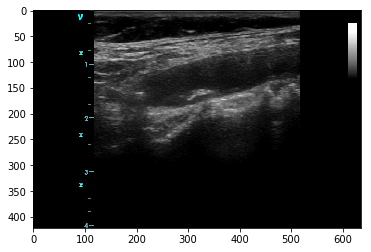

In [4]:
# reading single image using imread function of matplotlib
image = plt.imread('Data/Raw/sagittal1.png')
plt.imshow(image)

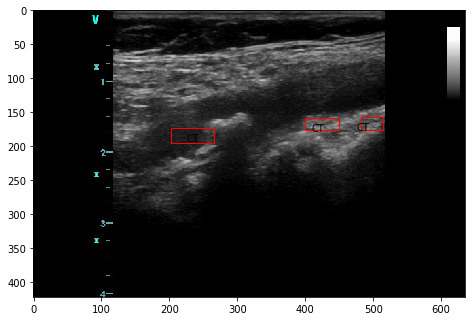

In [5]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

n = 37
# read and plot the image
image = plt.imread('Data/Raw/sagittal%d.png' %n)
plt.imshow(image)

# iterating over the image for different objects

for _,row in train[train.image_names == "sagittal%d.png" %n].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    width = xmax - xmin
    height = ymax - ymin

    # assign different color to different classes of objects
    if row.composition == 'Calcified Tissue':
        edgecolor = 'r'
        ax.annotate('CT', xy=(xmax-40,ymin+20))
    elif row.composition == 'Fibrous Tissue':
        edgecolor = 'b'
        ax.annotate('FT', xy=(xmax-40,ymin+20))
    elif row.composition == 'Lipid Core':
        edgecolor = 'g'
        ax.annotate('LC', xy=(xmax-40,ymin+20))

    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

    ax.add_patch(rect) 
    plt.savefig(f'Data/Annotated/sagittal%d_annotated.png' %n) 

        